<a href="https://colab.research.google.com/github/valentinasilva8/Iris-Classifier/blob/main/Iris_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load the iris dataset
iris = datasets.load_iris()

In [ ]:
# Step 2: Display dataset attributes
print("=== Step 2: Dataset Attributes ===")
print("Dataset shape:", iris.data.shape)
print("Number of samples:", iris.data.shape[0])
print("Number of features:", iris.data.shape[1])
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("\nDataset description:\n", iris.DESCR[:300], "...")

# Displaying Dataset Features
# Shape: 150 samples × 4 features
# Feature names: sepal length, sepal width, petal length, petal width
# Target names: map 0→setosa, 1→versicolor, 2→virginica.
# Description: includes details on instances, attributes and class distributions

=== Step 2: Dataset Attributes ===
Dataset shape: (150, 4)
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Dataset description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - pet ...


In [ ]:
# Step 3: Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# We now have a table where each row is one flower, columns are the four measurements plus the target label.

In [ ]:
# Step 4: Display head and tail
print("\n=== Step 4: Head of DataFrame ===")
print(df.head())
print("\n=== Step 4: Tail of DataFrame ===")
print(df.tail())


=== Step 4: Head of DataFrame ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

=== Step 4: Tail of DataFrame ===
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4

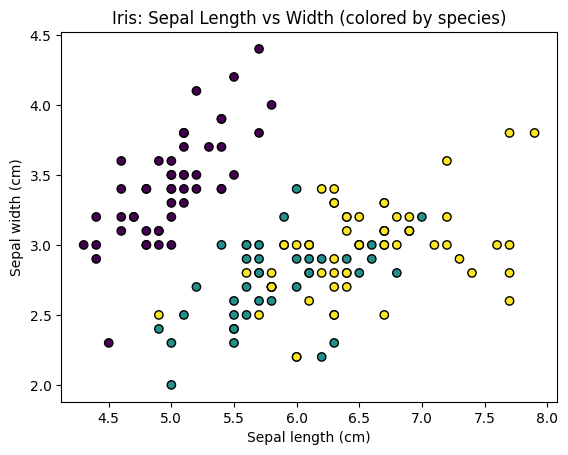

In [ ]:
# Step 5: Visualize the data

import matplotlib.pyplot as plt

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='viridis', edgecolor='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris: Sepal Length vs Width (colored by species)')
plt.show()

# Analyzing the plot:
# This plot has three groups:
# - Setosa (purple) sits up in the top-left and is easy to pick out.
# - Versicolor (green) and Virginica (yellow) hang out in the middle/right and overlap, so you can’t just draw one straight line to split them.
# We’ll need extra features or a non-linear model to tell those two apart cleanly.

In [ ]:
# Step 6: Train a K‑Nearest Neighbors classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split into training (70%) and test (30%) sets:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42)

# Initialize KNN with default k=5:
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data:
knn.fit(X_train, y_train)


KNeighborsClassifier()

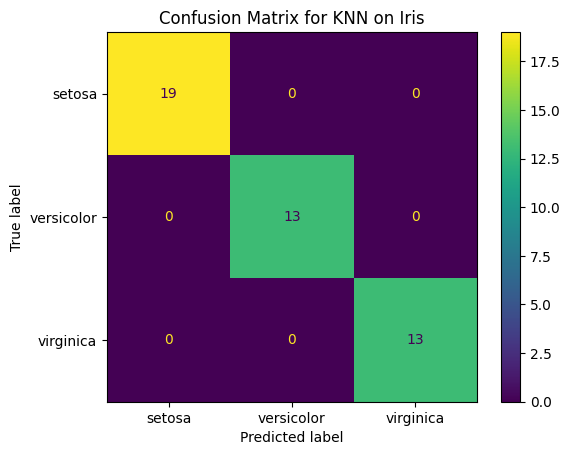

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume knn, X_test, y_test, and iris.target_names are already defined from previous steps

# 1. Make predictions on the test set
y_pred = knn.predict(X_test)

# 2. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix for KNN on Iris")
plt.show()

# Interpreting the matrix:
# For setosa, 19 out of 19 test samples were correctly predicted as setosa. For versicolor, 13/13 were correct. For virginica, 13/13 were correct.
# All off‑diagonal entries are zero, which matches our 100% accuracy on the test set.



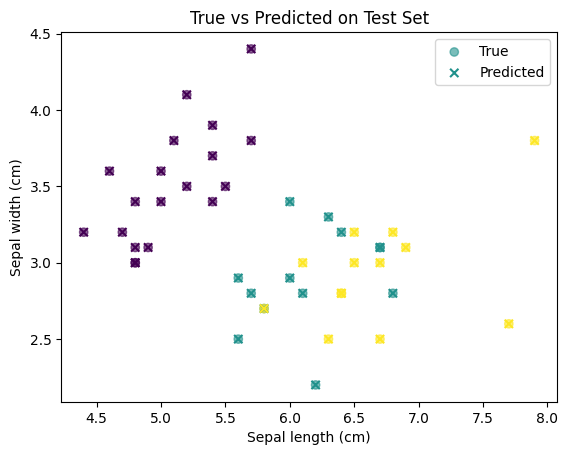

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
# Plot true labels with circles
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
            marker='o', alpha=0.6, label='True')
# Plot predicted labels with crosses
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred,
            marker='x', label='Predicted')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title('True vs Predicted on Test Set')
plt.show()

#Intepreting the plot:
# Circles = actual species
# Crosses = what the model predicted
# Perfect overlap means a correct classification. Misaligned marks (none here) would show mistakes.

In [ ]:
# Step 7: Evaluate accuracy

accuracy = knn.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2%}")


Test set accuracy: 100.00%
